In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
train_data = pd.read_excel('Datasets/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### EDA

In [3]:
train_data.shape  

(10683, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Checking for null values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Dropping missing values
train_data.dropna(inplace=True)

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Checking for duplicate values
train_data.duplicated().sum()

220

In [9]:
# Checking data types in datasets
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Data Preprocessing

In [10]:
# As we have some variables in daytime format but showing as object above, we need to conver them into daytime format 
# lets define a function to fullfill above requirement
def change_into_dateime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [11]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_dateime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
# Date_of_Journey column contains date in DDMMYYYY format, our ML algorithm will not understand this, 
# so we need to split column this column into day, month, and year.

train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-30 05:50:00,2021-08-30 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-30 18:05:00,2021-08-30 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-30 16:50:00,2021-08-30 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
train_data.drop('Date_of_Journey', axis = 1, inplace= True)

In [16]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_minute(df, col):
    df[col+'_minute'] = df[col].dt.minute
    
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)

In [17]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [19]:
# Convering Duration column into list to access each element 
duration = list(train_data['Duration'])

In [20]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [21]:
# Updating Duration column with calculated values
train_data['Duration'] = duration

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
def get_hour(x):
    return x.split(' ')[0][0:-1]
   
def get_minute(x):
    return x.split(' ')[1][0:-1]    

In [24]:
train_data['Duration_hours'] = train_data['Duration'].apply(get_hour)
train_data['Duration_mins'] = train_data['Duration'].apply(get_minute)

In [25]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [26]:
drop_column(train_data, 'Duration')

In [27]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [28]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [29]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

#### Dealing with Categorical Data

In [30]:
# Getting list of categorical data colmns and continuos data columns

cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [31]:
cont_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
cont_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [34]:
# We will deal with categorical data by using OneHotEncoding Technique
categorical_col = train_data[cat_col]
categorical_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [35]:
# Finding out how much is the count of each category of 'Airline' feature
categorical_col['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

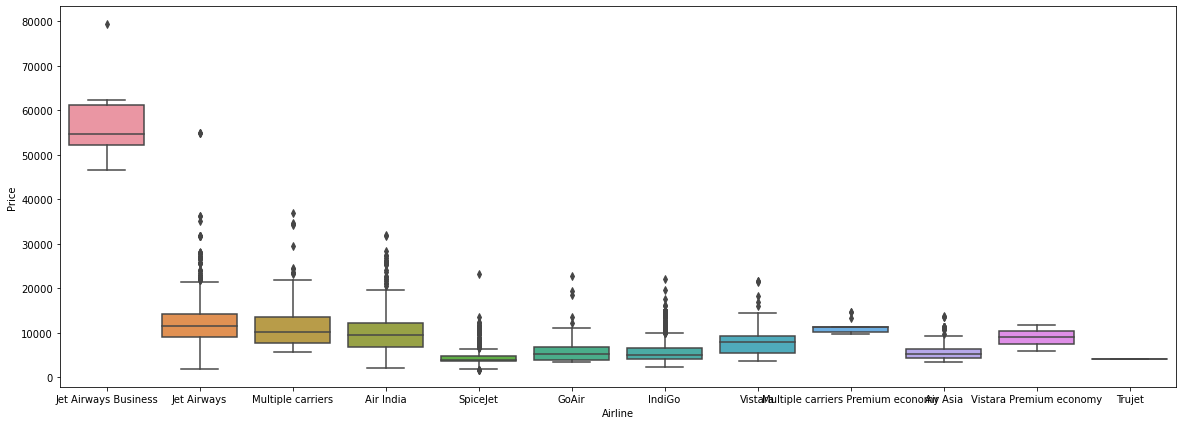

In [42]:
# How 'Airline' values are distributed against 'Price'
plt.figure(figsize=(20,7))
sns.boxplot(x = 'Airline', y = 'Price', data=train_data.sort_values('Price', ascending=False))

In [43]:
# Getting dummies for 'Airline' column
Airline = pd.get_dummies(categorical_col['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [44]:
# Finding out how much is the count of each category of 'Source' feature
categorical_col['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

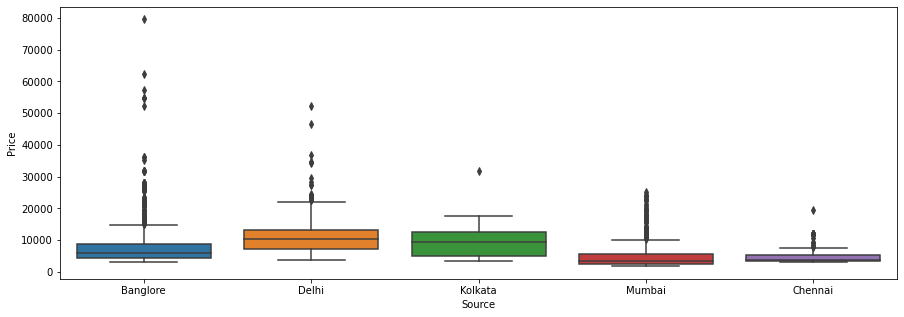

In [47]:
# How 'Source' values are distributed against 'Price'
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Source', y = 'Price', data=train_data.sort_values('Price', ascending=False))

In [48]:
# Getting dummies for 'Source' column
Source = pd.get_dummies(categorical_col['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [49]:
# Finding out how much is the count of each category of 'Destination' feature
categorical_col['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

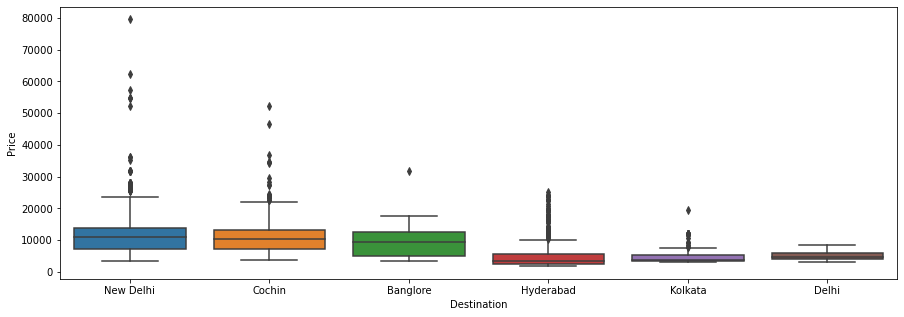

In [50]:
# How 'Destination' values are distributed against 'Price'
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Destination', y = 'Price', data=train_data.sort_values('Price', ascending=False))

In [51]:
# Getting dummies for 'Destination' column
Destination = pd.get_dummies(categorical_col['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [62]:
# Splitting Route on '→' and creating separate route columns in categorical_col dataframe
categorical_col['Route_1'] = categorical_col['Route'].str.split('→').str[0]
categorical_col['Route_2'] = categorical_col['Route'].str.split('→').str[1]
categorical_col['Route_3'] = categorical_col['Route'].str.split('→').str[2]
categorical_col['Route_4'] = categorical_col['Route'].str.split('→').str[3]
categorical_col['Route_5'] = categorical_col['Route'].str.split('→').str[4]

<ipython-input-62-38d281cb4c41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_col['Route_1'] = categorical_col['Route'].str.split('→').str[0]
<ipython-input-62-38d281cb4c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_col['Route_2'] = categorical_col['Route'].str.split('→').str[1]
<ipython-input-62-38d281cb4c41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [64]:
categorical_col.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN


In [65]:
# Dropping 'Route' colums
drop_column(categorical_col,'Route')

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
# checking for null values in categorical_col dataframe
categorical_col.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [69]:
# Filling null values by 'None'
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical_col[i].fillna('None',inplace=True)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
# Cross checking for the null values
categorical_col.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [74]:
for i in categorical_col.columns:
    print('{} has total {} categories'.format(i, len(categorical_col[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [75]:
'''As our Route_2, Route_3 and Route_4 have more number of categories, we will use label encoding to reduce
 Multidimensionality problem''' 

from sklearn.preprocessing import LabelEncoder

In [76]:
encoder = LabelEncoder()

In [77]:
categorical_col.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [78]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical_col[i] = encoder.fit_transform(categorical_col[i])

<ipython-input-78-17f33543ca37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_col[i] = encoder.fit_transform(categorical_col[i])


In [79]:
categorical_col.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [80]:
categorical_col['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [81]:
drop_column(categorical_col,'Additional_Info')

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
categorical_col.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [84]:
categorical_col['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [85]:
categorical_col['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [86]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [87]:
categorical_col['Total_Stops'] = categorical_col['Total_Stops'].map(dict)

<ipython-input-87-dcd184111b01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_col['Total_Stops'] = categorical_col['Total_Stops'].map(dict)


In [88]:
categorical_col.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [92]:
# We will now concatenate all the dataframes to form the final data for model building

data_train = pd.concat([categorical_col,Airline, Source, Destination, train_data[cont_col]], axis = 1)

In [93]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [94]:
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')

In [95]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [96]:
# To visualize all 35 columns, we will extend limit of pandas display
pd.set_option('display.max_columns', 35)

In [97]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


#### Handling Outliers in Data

In [98]:
def plot(df, col_name):
    fig, (ax1, ax2) = plt.subplots(2,1)
    sns.distplot(df[col_name], ax=ax1)
    sns.boxplot(df[col_name], ax=ax2)

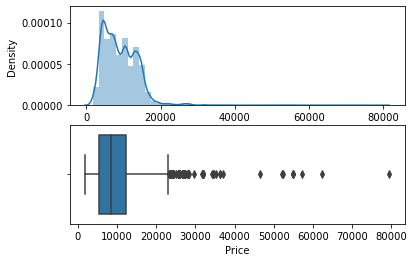

In [101]:
plot(data_train, 'Price')

In [102]:
''' With some domain expert advice, Price >= 40000 can be considered outliers, so we will impute
them with median'''

data_train['Price']= np.where(data_train['Price']>=40000, data_train['Price'].median(),data_train['Price'])

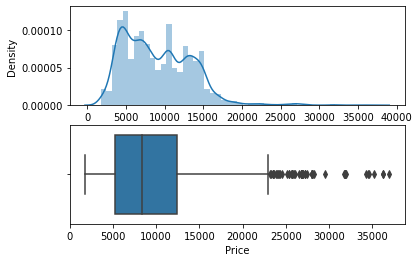

In [103]:
plot(data_train, 'Price')

In [104]:
# Spliting data into X & y (Independent and Dependent variables)
X = data_train.drop('Price', axis = 1)
y = data_train['Price']

#### Selection of Best Features using Feature Selection Technique

In [107]:
from sklearn.feature_selection import mutual_info_classif

In [108]:
mutual_info_classif(X, y)

array([2.1345755 , 2.09780478, 2.78864194, 2.29052203, 1.45392662,
       0.75268022, 0.75349734, 0.10387145, 0.6585492 , 0.91527935,
       0.        , 0.57751541, 0.01527777, 0.33162557, 0.        ,
       0.21449271, 0.        , 0.18289033, 1.5269496 , 0.89699573,
       0.30288151, 1.53847528, 0.40428947, 0.28805311, 0.16388811,
       0.37861524, 1.0731384 , 0.86378782, 1.44425864, 1.2190547 ,
       1.87135168, 1.50027716, 1.74662975, 1.05353158])

In [109]:
# Creating importance dataframe according to score
imp_df = pd.DataFrame(mutual_info_classif(X, y), index = X.columns)

In [110]:
imp_df

,0
Total_Stops,2.145582
Route_1,2.019563
Route_2,2.744733
Route_3,2.313871
Route_4,1.521961
Route_5,0.700258
Air India,0.768733
GoAir,0.104285
IndiGo,0.663650
Jet Airways,0.917742


In [117]:
imp_df.columns = ['Importance_Score']

In [118]:
imp_df.sort_values('Importance_Score', ascending=False)

,Importance_Score
Route_2,2.744733
Route_3,2.313871
Total_Stops,2.145582
Route_1,2.019563
Arrival_Time_hour,1.806251
Duration_hours,1.782335
Delhi,1.549668
Arrival_Time_minute,1.526835
Cochin,1.524092
Route_4,1.521961


### Building Model - Random Forest

In [124]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [120]:
# Splitting our data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [122]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 34)
(2137, 34)
(8545,)
(2137,)


In [128]:
# Definig function, so that we can use it again for different models
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_predicted = model.predict(X_test)
    pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predicted})
    print('\n')
    print(pred_df)
    print('\n')
    print('r2_score: {}'.format(metrics.r2_score(y_test, y_predicted)))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predicted)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predicted)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predicted))))
    
    sns.distplot(y_test - y_predicted)

In [126]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9532462536954706


        Actual     Predicted
5827    3100.0   3321.590000
4153    8018.0   8300.300000
10149  17461.0  16568.170000
3719    4823.0   4866.420000
7776    3943.0   3980.370000
...        ...           ...
3843    9296.0  11222.931000
2388    4435.0  13315.400000
7518    3543.0   3578.885667
4336    6121.0   5478.410000
5115    7980.0   8396.670000

[2137 rows x 2 columns]


r2_score: 0.8274008640287399
MAE: 1129.4219336420222
MSE: 3225804.8782021957
RMSE: 1796.0525822486923


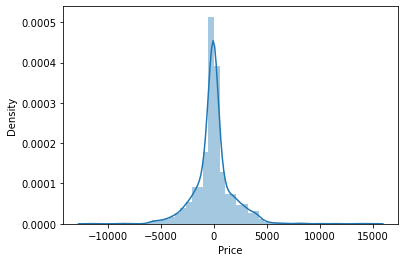

In [129]:
predict(RandomForestRegressor())

### Importing different algorithms and checking performances of each algorithm

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.6118362331491295


        Actual     Predicted
5827    3100.0   3577.235893
4153    8018.0   9184.284687
10149  17461.0  13191.135594
3719    4823.0   3030.652921
7776    3943.0   4899.284325
...        ...           ...
3843    9296.0  12736.736204
2388    4435.0   5345.622258
7518    3543.0   3917.893587
4336    6121.0   6232.219508
5115    7980.0  10408.337634

[2137 rows x 2 columns]


r2_score: 0.6314540808913136
MAE: 1899.99696166205
MSE: 6887967.410800204
RMSE: 2624.4937437151957


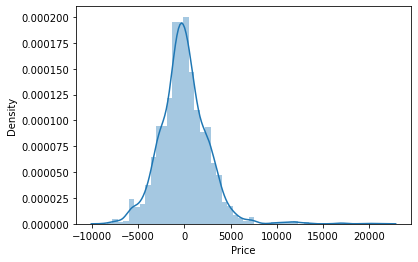

In [131]:
# Applying Linear Regression algorithm
predict(LinearRegression())

Training Score: 0.778369147125753


        Actual  Predicted
5827    3100.0     2890.0
4153    8018.0     8128.8
10149  17461.0    10540.4
3719    4823.0     5033.0
7776    3943.0     4383.2
...        ...        ...
3843    9296.0    11408.8
2388    4435.0     9999.0
7518    3543.0     3680.6
4336    6121.0     5270.4
5115    7980.0     8725.0

[2137 rows x 2 columns]


r2_score: 0.6697270216971988
MAE: 1693.4536265793167
MSE: 6172662.32853533
RMSE: 2484.484318432163


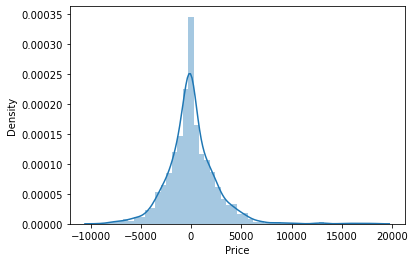

In [132]:
# Applying KNN algorithm
predict(KNeighborsRegressor())

Training Score: 0.9670523495869109


        Actual     Predicted
5827    3100.0   3625.000000
4153    8018.0   9646.000000
10149  17461.0  23267.000000
3719    4823.0   4823.000000
7776    3943.0   3943.000000
...        ...           ...
3843    9296.0  11280.666667
2388    4435.0   3782.000000
7518    3543.0   3543.000000
4336    6121.0   4441.000000
5115    7980.0   8452.000000

[2137 rows x 2 columns]


r2_score: 0.7138604571193345
MAE: 1290.7262517547965
MSE: 5347827.079648261
RMSE: 2312.5369358451903


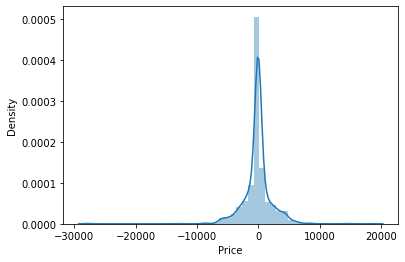

In [133]:
# Applying Decision Tree algorithm
predict(DecisionTreeRegressor())